In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv("kpopidols.csv")
df

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
0,2Soul,Kim Younghoon,김영훈,이솔,1997-09-10,7 O'clock,South Korea,NaN,172,55,NaN,NaN,NaN,M
1,A-min,Cho Minwoo,조민우,아민,2004-05-22,EPEX,South Korea,NaN,175,54,Namyangju,NaN,NaN,M
2,A-ra,Choi Eunji,최은지,아라,2003-07-25,Girls' World,South Korea,NaN,158,0,Seoul,NaN,NaN,F
3,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,181,62,NaN,NaN,NaN,M
4,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,177,63,NaN,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,Ziu,Park Heejun,박희준,지우,1997-06-16,VAV,South Korea,NaN,185,70,NaN,NaN,NaN,M
1774,ZN,Bae Jinye,배진예,지엔,1994-06-09,LABOUM,South Korea,NaN,169,48,Bucheon,UNI.T,NaN,F
1775,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,170,0,NaN,NaN,NaN,F
1776,Zuho,Bae Juho,백주호,주호,1996-07-04,SF9,South Korea,NaN,0,0,NaN,NaN,NaN,M


In [63]:
df.isnull().sum()

Stage.Name           0
Full.Name            9
Korean.Name         10
K.Stage.Name         1
Date.of.Birth        2
Group              146
Country              0
Second.Country    1716
Height               0
Weight               0
Birthplace         944
Other.Group       1638
Former.Group      1514
Gender               0
dtype: int64

In [64]:
df[(df['Height'] == 0) | (df['Weight'] == 0)]

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
2,A-ra,Choi Eunji,최은지,아라,2003-07-25,Girls' World,South Korea,NaN,158,0,Seoul,NaN,NaN,F
5,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,NaN,163,0,Daegu,NaN,NaN,F
7,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,NaN,0,0,Yeosu,NaN,NaN,F
8,Ahyeon,Jung Ahyeon,정아현,아현,2007-04-11,BABYMONSTER,South Korea,NaN,0,0,NaN,NaN,NaN,F
9,Ahyoon,Choi Subin,최수빈,아윤,2004-10-23,BOTOPASS,South Korea,NaN,0,0,NaN,NaN,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1769,Zero,Nasukawa Shota,나스카와 쇼타,제로,2003-01-20,T1419,Japan,NaN,0,0,NaN,NaN,NaN,M
1772,Zin,Jin Hyunbin,진현빈,지인,2001-08-31,bugAboo,South Korea,NaN,0,0,NaN,NaN,NaN,F
1775,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,170,0,NaN,NaN,NaN,F
1776,Zuho,Bae Juho,백주호,주호,1996-07-04,SF9,South Korea,NaN,0,0,NaN,NaN,NaN,M


In [65]:
df_no_zeros = df[(df['Height'] != 0) & (df['Weight'] != 0)]
df_no_zeros

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
0,2Soul,Kim Younghoon,김영훈,이솔,1997-09-10,7 O'clock,South Korea,NaN,172,55,NaN,NaN,NaN,M
1,A-min,Cho Minwoo,조민우,아민,2004-05-22,EPEX,South Korea,NaN,175,54,Namyangju,NaN,NaN,M
3,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,181,62,NaN,NaN,NaN,M
4,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,177,63,NaN,NaN,NaN,M
6,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,NaN,160,44,Wonju,NaN,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,Zelo,Choi Junhong,최준홍,젤로,1996-10-15,B.A.P,South Korea,NaN,182,63,Mokpo,NaN,NaN,M
1770,Zhou Mi,Zhou Mi,조미,조미,1986-04-19,Super Junior-M,China,NaN,184,64,Wuhan,NaN,NaN,M
1771,Zico,Woo Jiho,우지호,지코,1992-09-14,Block B,South Korea,NaN,182,65,Seoul,NaN,NaN,M
1773,Ziu,Park Heejun,박희준,지우,1997-06-16,VAV,South Korea,NaN,185,70,NaN,NaN,NaN,M


<AxesSubplot:xlabel='Country', ylabel='Weight'>

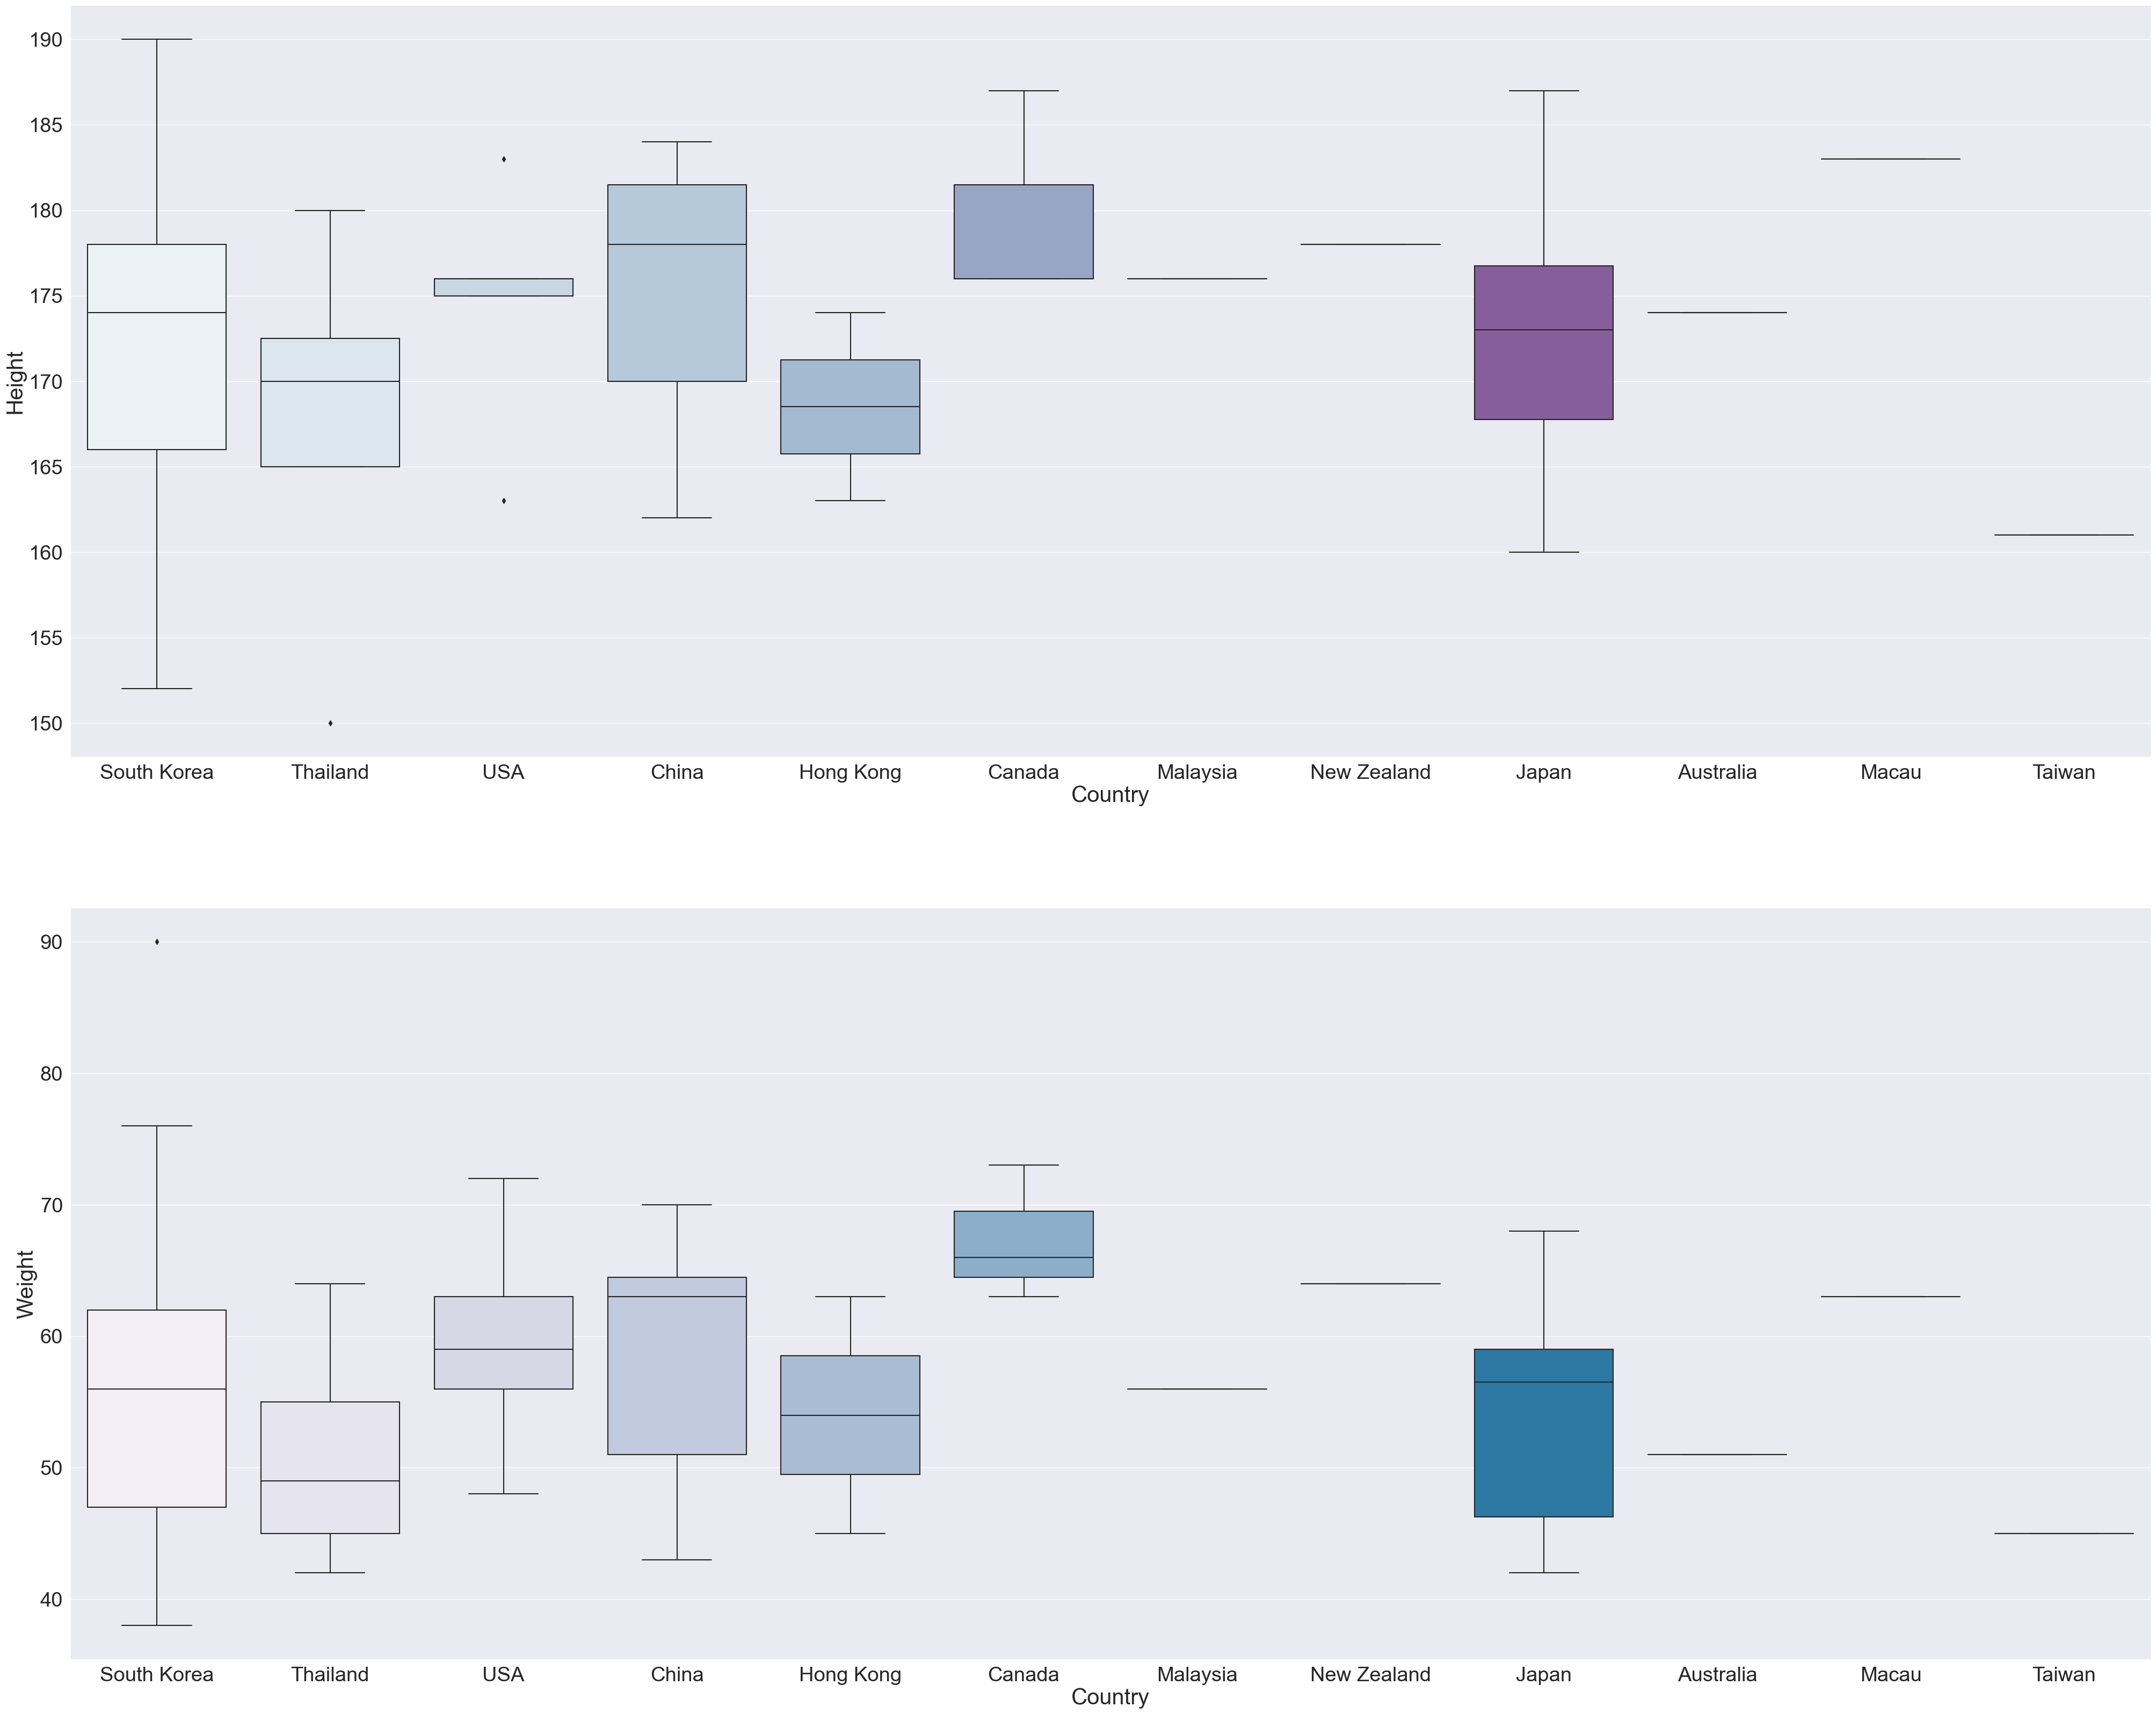

In [66]:
# Checking outliers
sns.set(font_scale=2.5)
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(50, 40)
sns.boxplot(data=df_no_zeros,y="Height",x="Country",orient="v",ax=axes[0], palette="BuPu")
sns.boxplot(data=df_no_zeros,y="Weight",x="Country",orient="v",ax=axes[1], palette="PuBu")

In [67]:
# remove outliers
df_no_zeros[df_no_zeros['Country'] == "Malaysia"]

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
603,Isaac,Voo Isaak,부 아이젝,아이젝,1994-12-12,IN2IT,Malaysia,NaN,176,56,NaN,NaN,NaN,M


In [68]:
 df[df['Country'] == "Malaysia"]

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
603,Isaac,Voo Isaak,부 아이젝,아이젝,1994-12-12,IN2IT,Malaysia,NaN,176,56,NaN,NaN,NaN,M


In [69]:
df_no_zeros[df_no_zeros['Country'] == 'New Zealand']

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
641,Jaeyun,Moon Jaeyun,문재윤,재윤,2002-07-02,8TURN,New Zealand,South Korea,178,64,NaN,NaN,NaN,M


In [70]:
df[df['Country'] == "New Zealand"]

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
641,Jaeyun,Moon Jaeyun,문재윤,재윤,2002-07-02,8TURN,New Zealand,South Korea,178,64,NaN,NaN,NaN,M


In [71]:
df_no_zeros[df_no_zeros['Country'] == 'Australia']

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
1118,Nina,Nina Nadia Mateer,니나 나디아 마티어,니나,2003-03-15,IRRIS,Australia,South Korea,174,51,Brisbane,NaN,NaN,F


In [72]:
df[df['Country'] == "Australia"]

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
61,Bang Chan,Bang Chan,방찬,방찬,1997-10-03,Stray Kids,Australia,South Korea,0,0,Sydney,3RACHA,NaN,M
282,E.sha,Kwon Yena,권예나,이샤,1998-12-29,X:IN,Australia,South Korea,0,0,NaN,NaN,NaN,F
949,Lily,Lily Jin Morrow,릴리 진 머로우,릴리,2002-10-17,NMIXX,Australia,South Korea,0,0,Marysville,NaN,NaN,F
1118,Nina,Nina Nadia Mateer,니나 나디아 마티어,니나,2003-03-15,IRRIS,Australia,South Korea,174,51,Brisbane,NaN,NaN,F


In [73]:
df_no_zeros[df_no_zeros['Country'] == 'Macau']

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
1309,Shita,Chae Gaho,채가호,시타,1998-10-01,JWiiver,Macau,NaN,183,63,Macau,NaN,NaN,M


In [74]:
df[df['Country'] == "Macau"]

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
1309,Shita,Chae Gaho,채가호,시타,1998-10-01,JWiiver,Macau,NaN,183,63,Macau,NaN,NaN,M


In [75]:
df_no_zeros[df_no_zeros['Country'] == 'Taiwan']

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
1312,Shuhua,Yeh Shuhua,예슈화,슈화,2000-01-06,(G)I-DLE,Taiwan,NaN,161,45,NaN,NaN,NaN,F


In [76]:
df[df['Country'] == "Taiwan"]

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
150,Chiayi,Li Chiayi,지아이,지아이,2000-01-22,FANATICS,Taiwan,NaN,164,0,NaN,FANATICS FLAVOR,NaN,F
862,Kelly,Lin Kelly,린 켈리,켈리,2002-01-16,TRI.BE,Taiwan,NaN,0,0,Kaohsiung,NaN,NaN,F
921,Lai Kuanlin,Lai Kuanlin,라이관린,라이관린,2001-09-23,Wanna One,Taiwan,NaN,0,0,New Taipei,NaN,NaN,M
952,Lin Lin,Huang Ziting,황자정,린린,2003-07-05,NaN,Taiwan,NaN,0,0,NaN,NaN,Cherry Bullet,F
1145,Rainie,Chu Chingyu,주칭위,레이니,2000-11-16,bugAboo,Taiwan,NaN,0,0,NaN,NaN,NaN,F
1179,Rona,Chang Ching,장찡,로나,2002-06-05,ILY:1,Taiwan,NaN,165,0,Taipei,NaN,NaN,F
1312,Shuhua,Yeh Shuhua,예슈화,슈화,2000-01-06,(G)I-DLE,Taiwan,NaN,161,45,NaN,NaN,NaN,F
1371,Soso,Wang Chingyi,왕징이,소소,2001-03-14,GWSN,Taiwan,NaN,0,0,NaN,NaN,NaN,F
1493,Tzuyu,Chou Tzuyu,저우쯔위,쯔위,1999-06-14,Twice,Taiwan,NaN,169,0,Tainan,NaN,NaN,F


In [77]:
df = df.drop([603, 641, 1118, 1309, 1312])
df

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
0,2Soul,Kim Younghoon,김영훈,이솔,1997-09-10,7 O'clock,South Korea,NaN,172,55,NaN,NaN,NaN,M
1,A-min,Cho Minwoo,조민우,아민,2004-05-22,EPEX,South Korea,NaN,175,54,Namyangju,NaN,NaN,M
2,A-ra,Choi Eunji,최은지,아라,2003-07-25,Girls' World,South Korea,NaN,158,0,Seoul,NaN,NaN,F
3,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,181,62,NaN,NaN,NaN,M
4,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,177,63,NaN,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,Ziu,Park Heejun,박희준,지우,1997-06-16,VAV,South Korea,NaN,185,70,NaN,NaN,NaN,M
1774,ZN,Bae Jinye,배진예,지엔,1994-06-09,LABOUM,South Korea,NaN,169,48,Bucheon,UNI.T,NaN,F
1775,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,170,0,NaN,NaN,NaN,F
1776,Zuho,Bae Juho,백주호,주호,1996-07-04,SF9,South Korea,NaN,0,0,NaN,NaN,NaN,M


In [78]:
# replacing 0's with the mean
df['Height']=df['Height'].replace(0, round(df_no_zeros['Height'].mean()))
df['Weight']=df['Weight'].replace(0, round(df_no_zeros['Weight'].mean()))
df

,Stage.Name,Full.Name,Korean.Name,K.Stage.Name,Date.of.Birth,Group,Country,Second.Country,Height,Weight,Birthplace,Other.Group,Former.Group,Gender
0,2Soul,Kim Younghoon,김영훈,이솔,1997-09-10,7 O'clock,South Korea,NaN,172,55,NaN,NaN,NaN,M
1,A-min,Cho Minwoo,조민우,아민,2004-05-22,EPEX,South Korea,NaN,175,54,Namyangju,NaN,NaN,M
2,A-ra,Choi Eunji,최은지,아라,2003-07-25,Girls' World,South Korea,NaN,158,55,Seoul,NaN,NaN,F
3,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,181,62,NaN,NaN,NaN,M
4,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,177,63,NaN,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,Ziu,Park Heejun,박희준,지우,1997-06-16,VAV,South Korea,NaN,185,70,NaN,NaN,NaN,M
1774,ZN,Bae Jinye,배진예,지엔,1994-06-09,LABOUM,South Korea,NaN,169,48,Bucheon,UNI.T,NaN,F
1775,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,170,55,NaN,NaN,NaN,F
1776,Zuho,Bae Juho,백주호,주호,1996-07-04,SF9,South Korea,NaN,172,55,NaN,NaN,NaN,M


In [79]:
# most of the data for the countries, other group, and former group are null so we can remove those columns

# we also haven't learned how to parse through non-English strings, so we can also remove the columns with Korean Hangul
df = df.drop(['Korean.Name', 'K.Stage.Name', 'Second.Country', 'Birthplace', 'Other.Group', 'Former.Group'], axis=1)
df

,Stage.Name,Full.Name,Date.of.Birth,Group,Country,Height,Weight,Gender
0,2Soul,Kim Younghoon,1997-09-10,7 O'clock,South Korea,172,55,M
1,A-min,Cho Minwoo,2004-05-22,EPEX,South Korea,175,54,M
2,A-ra,Choi Eunji,2003-07-25,Girls' World,South Korea,158,55,F
3,A.M,Seong Hyunwoo,1996-12-31,Limitless,South Korea,181,62,M
4,Ace,Jang Wooyoung,1992-08-28,VAV,South Korea,177,63,M
...,...,...,...,...,...,...,...,...
1773,Ziu,Park Heejun,1997-06-16,VAV,South Korea,185,70,M
1774,ZN,Bae Jinye,1994-06-09,LABOUM,South Korea,169,48,F
1775,Zoa,Cho Hyewon,2005-05-31,Weeekly,South Korea,170,55,F
1776,Zuho,Bae Juho,1996-07-04,SF9,South Korea,172,55,M


In [80]:
df.isnull().sum()

Stage.Name         0
Full.Name          9
Date.of.Birth      2
Group            146
Country            0
Height             0
Weight             0
Gender             0
dtype: int64

In [81]:
# We want to split the full name into first and last names so temporarily fill null values
df['Full.Name'] = df['Full.Name'].fillna("NA")

In [82]:
# adding the names to a list
names = df['Full.Name'].tolist()

In [83]:
# splitting names into first and last
first_name = []
last_name = []
for i in range(len(names)):
    full_name = names[i].split()
    first_name.append(full_name[0])
    last_name.append(full_name[len(full_name)-1])
    full_name.clear()
    

In [84]:
df['First.Name'] = first_name
df['Last.Name'] = last_name
df = df.drop('Full.Name', axis=1)
df

,Stage.Name,Date.of.Birth,Group,Country,Height,Weight,Gender,First.Name,Last.Name
0,2Soul,1997-09-10,7 O'clock,South Korea,172,55,M,Kim,Younghoon
1,A-min,2004-05-22,EPEX,South Korea,175,54,M,Cho,Minwoo
2,A-ra,2003-07-25,Girls' World,South Korea,158,55,F,Choi,Eunji
3,A.M,1996-12-31,Limitless,South Korea,181,62,M,Seong,Hyunwoo
4,Ace,1992-08-28,VAV,South Korea,177,63,M,Jang,Wooyoung
...,...,...,...,...,...,...,...,...,...
1773,Ziu,1997-06-16,VAV,South Korea,185,70,M,Park,Heejun
1774,ZN,1994-06-09,LABOUM,South Korea,169,48,F,Bae,Jinye
1775,Zoa,2005-05-31,Weeekly,South Korea,170,55,F,Cho,Hyewon
1776,Zuho,1996-07-04,SF9,South Korea,172,55,M,Bae,Juho


In [85]:
df = df[['Stage.Name', 'First.Name', 'Last.Name', 'Date.of.Birth', 'Group', 'Country', 'Height', 'Weight', 'Gender']]
df

,Stage.Name,First.Name,Last.Name,Date.of.Birth,Group,Country,Height,Weight,Gender
0,2Soul,Kim,Younghoon,1997-09-10,7 O'clock,South Korea,172,55,M
1,A-min,Cho,Minwoo,2004-05-22,EPEX,South Korea,175,54,M
2,A-ra,Choi,Eunji,2003-07-25,Girls' World,South Korea,158,55,F
3,A.M,Seong,Hyunwoo,1996-12-31,Limitless,South Korea,181,62,M
4,Ace,Jang,Wooyoung,1992-08-28,VAV,South Korea,177,63,M
...,...,...,...,...,...,...,...,...,...
1773,Ziu,Park,Heejun,1997-06-16,VAV,South Korea,185,70,M
1774,ZN,Bae,Jinye,1994-06-09,LABOUM,South Korea,169,48,F
1775,Zoa,Cho,Hyewon,2005-05-31,Weeekly,South Korea,170,55,F
1776,Zuho,Bae,Juho,1996-07-04,SF9,South Korea,172,55,M


In [86]:
df.isnull().sum()

Stage.Name         0
First.Name         0
Last.Name          0
Date.of.Birth      2
Group            146
Country            0
Height             0
Weight             0
Gender             0
dtype: int64

In [87]:
# it doesn't make sense to use imputation to fill in the null names so drop the names that are listed as NA
df = df[(df['First.Name'] != 'NA') | (df['Last.Name'] != 'NA')]
df

,Stage.Name,First.Name,Last.Name,Date.of.Birth,Group,Country,Height,Weight,Gender
0,2Soul,Kim,Younghoon,1997-09-10,7 O'clock,South Korea,172,55,M
1,A-min,Cho,Minwoo,2004-05-22,EPEX,South Korea,175,54,M
2,A-ra,Choi,Eunji,2003-07-25,Girls' World,South Korea,158,55,F
3,A.M,Seong,Hyunwoo,1996-12-31,Limitless,South Korea,181,62,M
4,Ace,Jang,Wooyoung,1992-08-28,VAV,South Korea,177,63,M
...,...,...,...,...,...,...,...,...,...
1773,Ziu,Park,Heejun,1997-06-16,VAV,South Korea,185,70,M
1774,ZN,Bae,Jinye,1994-06-09,LABOUM,South Korea,169,48,F
1775,Zoa,Cho,Hyewon,2005-05-31,Weeekly,South Korea,170,55,F
1776,Zuho,Bae,Juho,1996-07-04,SF9,South Korea,172,55,M


In [88]:
df.isnull().sum()

Stage.Name         0
First.Name         0
Last.Name          0
Date.of.Birth      1
Group            146
Country            0
Height             0
Weight             0
Gender             0
dtype: int64

In [89]:
# dropping row with null bday because there's only one
df[df['Date.of.Birth'].isna()]

,Stage.Name,First.Name,Last.Name,Date.of.Birth,Group,Country,Height,Weight,Gender
1128,On,Kim,Dongwoo,NaN,ABLUE,South Korea,177,65,M


In [90]:
df = df.drop([1128])
df

,Stage.Name,First.Name,Last.Name,Date.of.Birth,Group,Country,Height,Weight,Gender
0,2Soul,Kim,Younghoon,1997-09-10,7 O'clock,South Korea,172,55,M
1,A-min,Cho,Minwoo,2004-05-22,EPEX,South Korea,175,54,M
2,A-ra,Choi,Eunji,2003-07-25,Girls' World,South Korea,158,55,F
3,A.M,Seong,Hyunwoo,1996-12-31,Limitless,South Korea,181,62,M
4,Ace,Jang,Wooyoung,1992-08-28,VAV,South Korea,177,63,M
...,...,...,...,...,...,...,...,...,...
1773,Ziu,Park,Heejun,1997-06-16,VAV,South Korea,185,70,M
1774,ZN,Bae,Jinye,1994-06-09,LABOUM,South Korea,169,48,F
1775,Zoa,Cho,Hyewon,2005-05-31,Weeekly,South Korea,170,55,F
1776,Zuho,Bae,Juho,1996-07-04,SF9,South Korea,172,55,M


In [91]:
# function to weight the names
def weight_names(stage, first, last):
    if (stage == first) | (stage == last):
        return 0
        
    else:
        if (stage.lower() == first.lower())| (stage.lower() == last.lower()):
            return 1
        else:
            return 2
    

In [92]:
df['Name.Weight'] = df.apply(lambda x: weight_names(stage = x['Stage.Name'], first = x['First.Name'], last = x['Last.Name']), axis=1)

In [93]:
df

,Stage.Name,First.Name,Last.Name,Date.of.Birth,Group,Country,Height,Weight,Gender,Name.Weight
0,2Soul,Kim,Younghoon,1997-09-10,7 O'clock,South Korea,172,55,M,2
1,A-min,Cho,Minwoo,2004-05-22,EPEX,South Korea,175,54,M,2
2,A-ra,Choi,Eunji,2003-07-25,Girls' World,South Korea,158,55,F,2
3,A.M,Seong,Hyunwoo,1996-12-31,Limitless,South Korea,181,62,M,2
4,Ace,Jang,Wooyoung,1992-08-28,VAV,South Korea,177,63,M,2
...,...,...,...,...,...,...,...,...,...,...
1773,Ziu,Park,Heejun,1997-06-16,VAV,South Korea,185,70,M,2
1774,ZN,Bae,Jinye,1994-06-09,LABOUM,South Korea,169,48,F,2
1775,Zoa,Cho,Hyewon,2005-05-31,Weeekly,South Korea,170,55,F,2
1776,Zuho,Bae,Juho,1996-07-04,SF9,South Korea,172,55,M,2


In [94]:
df['Name.Weight'].unique()

array([2, 0, 1], dtype=int64)

In [95]:
# calculating age
from datetime import datetime, date

def calculate_age(birthdate):
    birthdate = datetime.strptime(birthdate, '%Y-%m-%d').date()
    today = date.today()
    return today.year - birthdate.year - (today.month < birthdate.month)

In [96]:
df['Age'] = df['Date.of.Birth'].apply(calculate_age)
df

,Stage.Name,First.Name,Last.Name,Date.of.Birth,Group,Country,Height,Weight,Gender,Name.Weight,Age
0,2Soul,Kim,Younghoon,1997-09-10,7 O'clock,South Korea,172,55,M,2,25
1,A-min,Cho,Minwoo,2004-05-22,EPEX,South Korea,175,54,M,2,19
2,A-ra,Choi,Eunji,2003-07-25,Girls' World,South Korea,158,55,F,2,19
3,A.M,Seong,Hyunwoo,1996-12-31,Limitless,South Korea,181,62,M,2,26
4,Ace,Jang,Wooyoung,1992-08-28,VAV,South Korea,177,63,M,2,30
...,...,...,...,...,...,...,...,...,...,...,...
1773,Ziu,Park,Heejun,1997-06-16,VAV,South Korea,185,70,M,2,25
1774,ZN,Bae,Jinye,1994-06-09,LABOUM,South Korea,169,48,F,2,28
1775,Zoa,Cho,Hyewon,2005-05-31,Weeekly,South Korea,170,55,F,2,18
1776,Zuho,Bae,Juho,1996-07-04,SF9,South Korea,172,55,M,2,26


In [97]:
df.isnull().sum()

Stage.Name         0
First.Name         0
Last.Name          0
Date.of.Birth      0
Group            146
Country            0
Height             0
Weight             0
Gender             0
Name.Weight        0
Age                0
dtype: int64

In [98]:
df = df.drop(['Stage.Name', 'First.Name', 'Last.Name','Date.of.Birth', 'Group'], axis=1)
df

,Country,Height,Weight,Gender,Name.Weight,Age
0,South Korea,172,55,M,2,25
1,South Korea,175,54,M,2,19
2,South Korea,158,55,F,2,19
3,South Korea,181,62,M,2,26
4,South Korea,177,63,M,2,30
...,...,...,...,...,...,...
1773,South Korea,185,70,M,2,25
1774,South Korea,169,48,F,2,28
1775,South Korea,170,55,F,2,18
1776,South Korea,172,55,M,2,26


In [99]:
# rearranging columns
df = df[['Name.Weight', 'Age', 'Height', 'Weight', 'Gender','Country']]
df

,Name.Weight,Age,Height,Weight,Gender,Country
0,2,25,172,55,M,South Korea
1,2,19,175,54,M,South Korea
2,2,19,158,55,F,South Korea
3,2,26,181,62,M,South Korea
4,2,30,177,63,M,South Korea
...,...,...,...,...,...,...
1773,2,25,185,70,M,South Korea
1774,2,28,169,48,F,South Korea
1775,2,18,170,55,F,South Korea
1776,2,26,172,55,M,South Korea


In [100]:
# cat-encode gender
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df

,Name.Weight,Age,Height,Weight,Gender,Country
0,2,25,172,55,1,South Korea
1,2,19,175,54,1,South Korea
2,2,19,158,55,0,South Korea
3,2,26,181,62,1,South Korea
4,2,30,177,63,1,South Korea
...,...,...,...,...,...,...
1773,2,25,185,70,1,South Korea
1774,2,28,169,48,0,South Korea
1775,2,18,170,55,0,South Korea
1776,2,26,172,55,1,South Korea


In [101]:
# frequency encoding the country
df['Country'].value_counts()

South Korea    1590
Japan            63
China            46
USA              18
Thailand         13
Taiwan            8
Canada            6
Hong Kong         5
Australia         3
Philippines       2
Indonesia         2
Vietnam           2
Germany           1
Belgium           1
India             1
Brazil            1
Russia            1
Name: Country, dtype: int64

In [102]:
fq_country = df.groupby('Country').size()/len(df)
df.loc[:, "{}_freq".format('Country')] = df['Country'].map(fq_country)

In [103]:
df = df.drop(['Country'], axis=1)

In [104]:
df.head()

,Name.Weight,Age,Height,Weight,Gender,Country_freq
0,2,25,172,55,1,0.901872
1,2,19,175,54,1,0.901872
2,2,19,158,55,0,0.901872
3,2,26,181,62,1,0.901872
4,2,30,177,63,1,0.901872


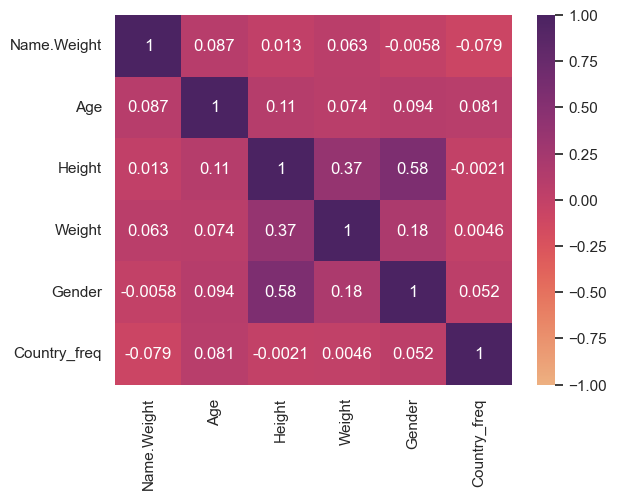

In [125]:
sns.set(font_scale=1)
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="flare")

In [106]:
X = df[['Age', 'Height', 'Weight', 'Gender', 'Country_freq']]
y = df[['Name.Weight']]

In [107]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [108]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
scale_X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, scale_X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

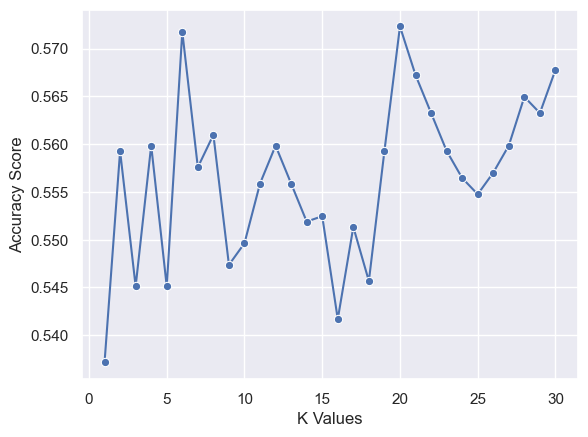

In [109]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [129]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [130]:
pred = knn.predict(X_test)

In [131]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, pred)}")
print(f"Precision Score of the classifier is: {precision_score(y_test, pred, average='weighted')}")
print(f"Recall Score of the classifier is: {recall_score(y_test, pred, average = 'weighted')}")
print(f"F1 Score of the classifier is: {f1_score(y_test, pred, average='weighted')}")

Accuracy of the classifier is: 0.5841209829867675
Precision Score of the classifier is: 0.5632985303882555
Recall Score of the classifier is: 0.5841209829867675
F1 Score of the classifier is: 0.5512506002496044


In [113]:
# Feature Selection
SPercentile = SelectPercentile(score_func = chi2, percentile=70)
SPercentile = SPercentile.fit(X,y)

In [114]:
cols = SPercentile.get_support(indices = True)
cols
features = X.columns[cols]
features

Index(['Age', 'Weight', 'Gender'], dtype='object')

In [115]:
X_select = df[['Age', 'Weight', 'Gender']]
y_select = df[['Name.Weight']]

In [116]:
# train test split
X_select_train, X_select_test, y_select_train, y_select_test = train_test_split(X_select, y_select, test_size=0.3)

In [117]:
knn_select = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_select_train, y_select_train)

KNeighborsClassifier(n_neighbors=6)

In [118]:
pred_select = knn.predict(X_select_test)

In [119]:
print(f"Accuracy of the classifier is: {accuracy_score(y_select_test, pred_select)}")
print(f"Precision Score of the classifier is: {precision_score(y_select_test, pred_select, average='weighted')}")
print(f"Recall Score of the classifier is: {recall_score(y_select_test, pred_select, average = 'weighted')}")
print(f"F1 Score of the classifier is: {f1_score(y_select_test, pred_select, average='weighted')}")

Accuracy of the classifier is: 0.5708884688090737
Precision Score of the classifier is: 0.5590765227211353
Recall Score of the classifier is: 0.5708884688090737
F1 Score of the classifier is: 0.5520391196899087
